In [1]:
import tensorflow as tf

from smot.training import build_management
from smot.jupyter import model_reports

model_build_target = build_management.build_cache().target(
  name='mnist/simple',
)

In [2]:
# Load (and cache) standard MNIST dataset.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Extract the pixel counts.
input_shape = x_train.shape[1:]

# Rescale the train and test data.
x_train = x_train / 255.
x_test = x_test / 255.

# Extract the number of classes.
n_classes = len(set(y_train))

# Convert the class numbers to 1-hot categorical values.
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

In [3]:
# Build a single softmax categorical layer.
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(
    input_shape=input_shape,
  ),
  tf.keras.layers.Dense(
    units=n_classes,
    activation='softmax',
  )
])

# Compile using 'Adam'
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  # Needed for the categorical softmax layer.
  loss=tf.keras.losses.categorical_crossentropy,
  metrics=['accuracy'],
)

# Print the model summary.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Epoch 1/3
375/375 [==============================] - 1s 2ms/step - loss: 1.1507 - accuracy: 0.6955 - val_loss: 0.4087 - val_accuracy: 0.8977
Epoch 2/3
375/375 [==============================] - 0s 1ms/step - loss: 0.4149 - accuracy: 0.8928 - val_loss: 0.3346 - val_accuracy: 0.9115

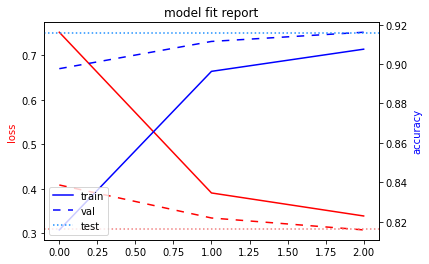

In [4]:
history = model.fit(
  x=x_train,
  y=y_train,
  batch_size=128,
  epochs=3,
  verbose=1,
  validation_split=0.2,
)

# Evaluate the model with the test data.
test_loss, test_accuracy = model_reports.model_fit_report(
  model=model,
  history=history,
  test_data=(x_test, y_test),
)

In [5]:
# Optional:
# model_build_target.save_model(model)

# model = model_build_target.load_model()
# model.summary()
